In [22]:
from functions import *
from agent import Qlearner
from environments import gridworld
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

(Creating Willemsen Gridworld)


<IPython.core.display.Javascript object>


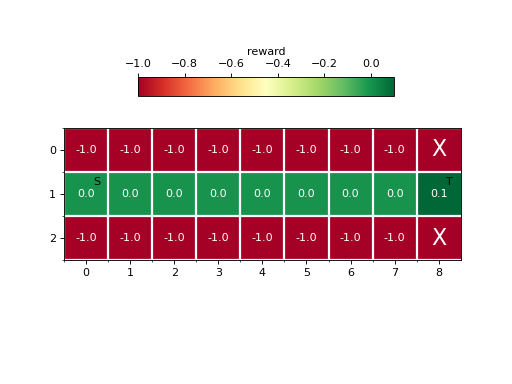

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x1ecf704fc70>)

In [23]:
# Create the gridworld, and set cell values to equal rewards
print('(Creating Willemsen Gridworld)')
grid = np.ones((3, 9)) * -1
grid[1,:8] = 0
grid[1, 8] = 0.1
terminal_state = np.array([[1, 8]])
initial_state = np.array([1, 0])
blacked_state = np.array([[0, 8],[2, 8]])

plot_gridworld(grid, terminal_state, initial_state, blacked_state)

In [24]:
n_episodes = 100
max_steps = 40
gamma = 0.8
alpha = 0.1
epsilon = 0.05
Learn = True
batch_size = 1

In [25]:
print('(Generating Trajectories and Learning Loop)')
env = gridworld(grid, terminal_state, initial_state, blacked_state, max_steps)
agent = Qlearner(alpha, epsilon, gamma, batch_size, initial_state, s_prior=None, learn=True)

epsilons = np.flip(np.linspace(0, 1, n_episodes))

for i in tqdm(range(n_episodes)):
    run_trajectory(env, agent, epsilons[i], abstract=False)

trajectories = agent.buffer.buffer[:n_episodes]

(Generating Trajectories and Learning Loop)


  0%|          | 0/100 [00:00<?, ?it/s]

In [21]:
agent.buffer.buffer

[[(array([1, 0]), 'up', array([0, 0]), -1.0, False),
  (array([0, 0]), 'right', array([0, 1]), -1.0, False),
  (array([0, 1]), 'left', array([0, 0]), -1.0, False),
  (array([0, 0]), 'down', array([1, 0]), 0.0, False),
  (array([1, 0]), 'left', array([1, 0]), 0.0, False),
  (array([1, 0]), 'up', array([0, 0]), -1.0, False),
  (array([0, 0]), 'left', array([0, 0]), -1.0, False),
  (array([0, 0]), 'left', array([0, 0]), -1.0, False),
  (array([0, 0]), 'down', array([1, 0]), 0.0, False),
  (array([1, 0]), 'right', array([1, 1]), 0.0, False),
  (array([1, 1]), 'up', array([0, 1]), -1.0, False),
  (array([0, 1]), 'right', array([0, 2]), -1.0, False),
  (array([0, 2]), 'left', array([0, 1]), -1.0, False),
  (array([0, 1]), 'right', array([0, 2]), -1.0, False),
  (array([0, 2]), 'down', array([1, 2]), 0.0, False),
  (array([1, 2]), 'up', array([0, 2]), -1.0, False),
  (array([0, 2]), 'down', array([1, 2]), 0.0, False),
  (array([1, 2]), 'up', array([0, 2]), -1.0, False),
  (array([0, 2]), 'rig

In [18]:
returns_table = cumulative_table(trajectories, gamma, Qpi_sa, agent.q_table)
rho = state_dist(agent.visits)
abs_action = action_abstraction(returns_table, rho)
sa_values, a_values, bias_squared = action_abstraction_bias(returns_table, abs_action)
heatmap = generate_heatmap(grid, rho)
heatmapQ = generate_heatmap(grid, agent.q_table, aggf=lambda x: max(v for v in x.values()))

(Plotting 1 of 1)


<IPython.core.display.Javascript object>


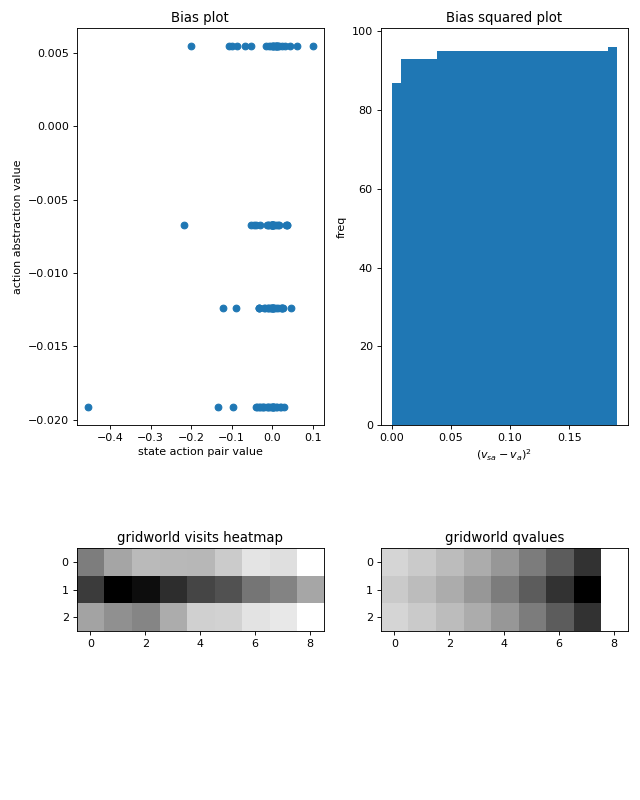

In [19]:
# First plot
%matplotlib notebook
print('(Plotting 1 of 1)')
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8, 10))

ax[0, 0].scatter(sa_values, a_values)
ax[0, 0].set_title('Bias plot')
ax[0, 0].set_xlabel('state action pair value')
ax[0, 0].set_ylabel('action abstraction value')
#ax[0, 0].set_ylim((0, 40))

ax[0, 1].hist(bias_squared, cumulative=True, bins=25)
ax[0, 1].set_title('Bias squared plot')
ax[0, 1].set_xlabel(r'$(v_{sa} - v_{a})^2$')
ax[0, 1].set_ylabel('freq')
# plt.ylim((0, 40))

ax[1, 0].imshow(heatmap, cmap='binary')
ax[1, 0].set_title('gridworld visits heatmap')

ax[1, 1].imshow(heatmapQ, cmap='binary')
ax[1, 1].set_title('gridworld qvalues')

plt.tight_layout()
plt.show()